In [ ]:
%load_ext autoreload
%autoreload 2

# ConvLSTM 
> Conv lstm model

In [ ]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [ ]:
PATH = Path.cwd().parent/'data'
Path.BASE_PATH = PATH

IMAGE_PATH = PATH/'UCF-101-frames'
SPLIT_PATH = PATH/'ucfTrainTestlist'

In [ ]:
files = get_sequence_paths(IMAGE_PATH)

In [ ]:
seq_len = 5
image_size = 128
assert len(files)/8 == len(files)//8

In [ ]:
#slow
val_idxs = get_split_idxs()

## Train

In [ ]:
dls = get_action_dataloaders(files, bs=32, image_size=image_size, seq_len=seq_len, val_idxs=val_idxs, random_sample=False)

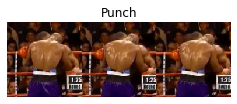

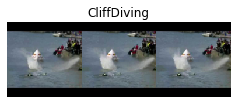

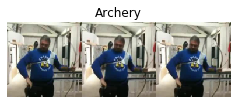

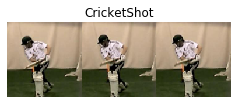

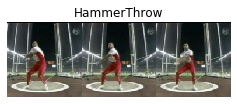

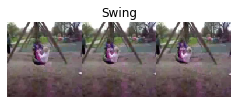

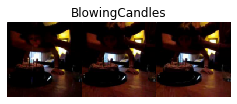

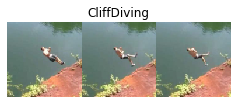

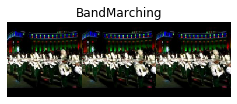

In [ ]:
dls.show_batch()

In [ ]:
model = ConvLSTM(num_classes=dls.c, hidden_dim=128)

In [ ]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, cbs=[ModelReseter()], splitter=convlstm_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.013182567432522774)

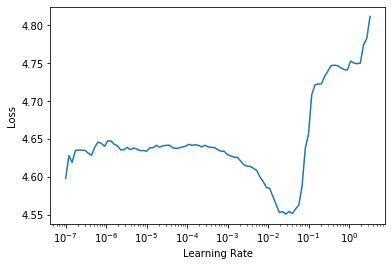

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.853281,3.509516,0.221517,00:41
1,1.776073,1.909425,0.486651,00:41
2,1.601582,2.048533,0.475549,00:42
3,1.881196,2.239291,0.413428,00:41
4,1.942819,2.214408,0.436426,00:41
5,1.884936,2.253722,0.406027,00:42
6,1.734221,2.127953,0.440920,00:42
7,1.624529,2.104753,0.451229,00:41
8,1.453890,1.924295,0.496167,00:41
9,1.326784,1.964062,0.478192,00:42


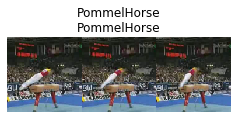

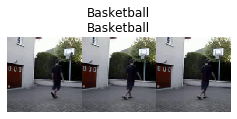

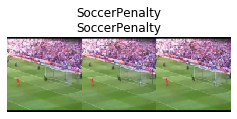

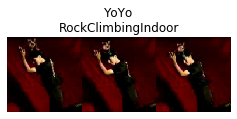

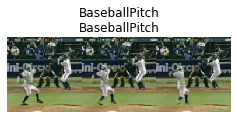

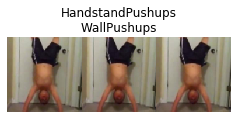

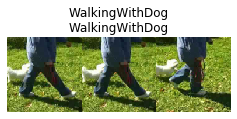

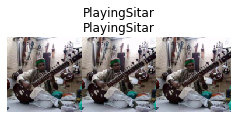

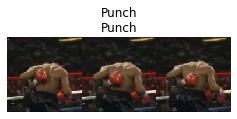

In [ ]:
learn.show_results()